# Group 10

Sikhi Yalavarthi, Kamesh Gupta, Vamsi Krishna kanderi murali, Azimi Bijan, Ritvik Raj Padige

# **LOAD DATA**

In [33]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [34]:
# Download nltk data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bijan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bijan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bijan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bijan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [35]:
df = pd.read_csv("ChatGPT-Sentiment.csv")
df.head()

,tweets
0,"Noun: sedan\n\nA sedan is like a car, but it's..."
1,"AI creation story ""Humans and AI, beyond the d..."
2,Renowned Israeli Writer Compares ChatGPT To We...
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...
4,Chatbots won't replace doctors. But a new stud...


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweets  4954 non-null   object
dtypes: object(1)
memory usage: 38.8+ KB


# **DATA CLEANING**

In [37]:

lemmatizer = WordNetLemmatizer()

In [38]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    text = re.sub(r'\@\w+','', text)
    
    text = re.sub(r'\W+|\d+', ' ', text)
    
    text = text.lower()
    
    
    tokens = word_tokenize(text)
    
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

df["cleaned_tweets"] = df["tweets"].apply(clean_text)

In [39]:
df[df['cleaned_tweets'].map(len) > 5]

,tweets,cleaned_tweets
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...
...,...,...
4949,@artificialguybr some things doesn't sound muc...,thing sound much like good chatgpt thing
4950,@SerLeighton Thanks. I don’t think that ChatGP...,thanks think chatgpt could write drama portfol...
4951,"What's more, I don't even use chatgpt because ...",even use chatgpt already writing use basically...
4952,Incredible! I got the TEMU invitation code &lt...,incredible got temu invitation code lt gt chat...


In [40]:
df.head()

,tweets,cleaned_tweets
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...


In [41]:
df.shape

(4954, 2)

# **Sentiment Analysis using VADER**

In [42]:
sid = SentimentIntensityAnalyzer()

In [43]:
df['scores'] = df['cleaned_tweets'].apply(lambda review: sid.polarity_scores(review))

df.head()

,tweets,cleaned_tweets,scores
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp..."
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp..."
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp..."
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp..."


In [44]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,tweets,cleaned_tweets,scores,compound
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019


In [45]:
df['sentiment'] = df['compound'].apply(lambda c: 'pos' if c > 0 else 'nuet' if c == 0  else 'neg')

df.head()


,tweets,cleaned_tweets,scores,compound,sentiment
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650,pos
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650,pos
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906,neg
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nuet
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,pos


# **DATA EXPLORATION**

In [46]:
sns.set(style="whitegrid")

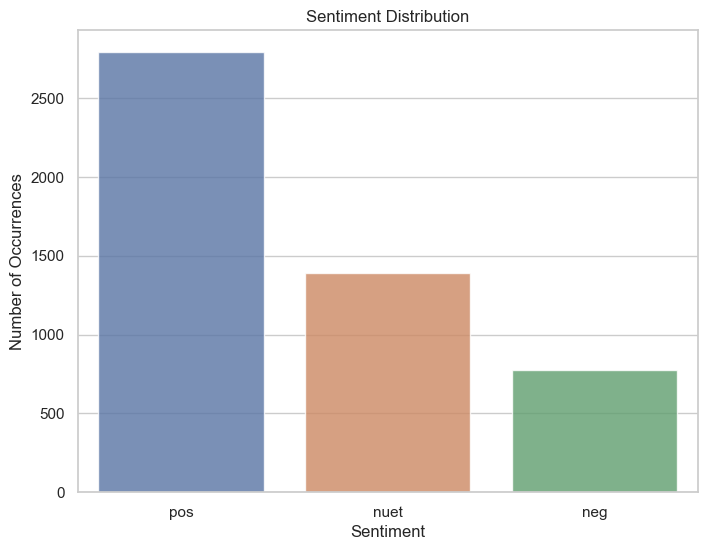

In [47]:
sentiment_count = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x = sentiment_count.index, y = sentiment_count.values, alpha=0.8)
plt.title('Sentiment Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sentiment', fontsize=12)
plt.show()

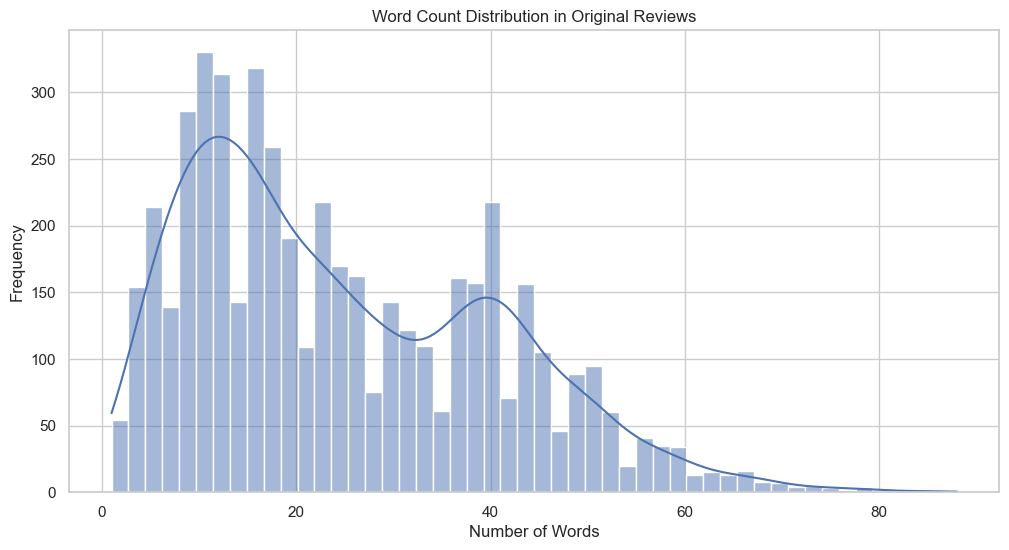

In [48]:
df['word_count'] = df['tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Original Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

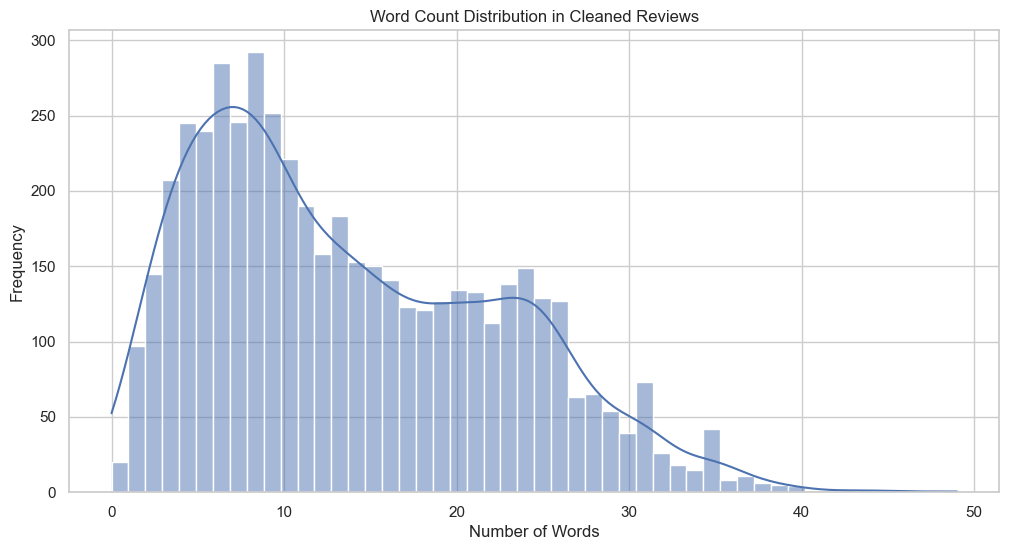

In [49]:
df['cleaned_word_count'] = df['cleaned_tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.histplot(df['cleaned_word_count'], bins=50, kde=True)
plt.title('Word Count Distribution in Cleaned Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

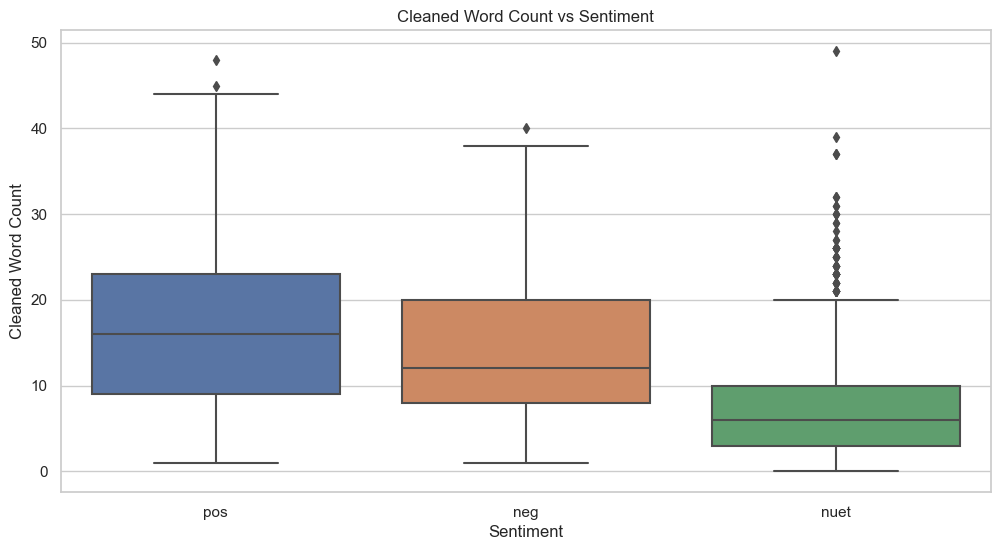

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment', y='cleaned_word_count', data=df)
plt.title('Cleaned Word Count vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Cleaned Word Count')
plt.show()

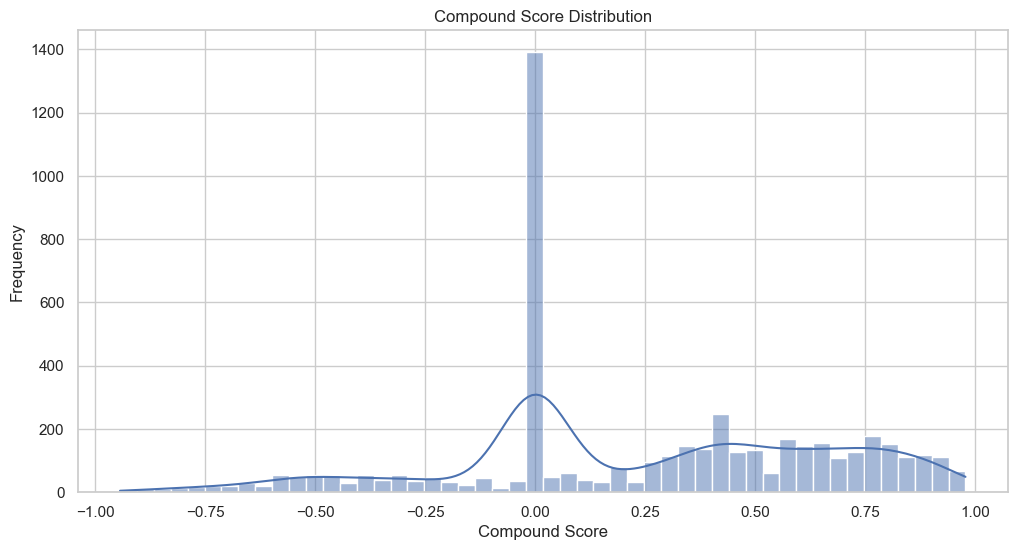

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(df['compound'], bins=50, kde=True)
plt.title('Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

# **TOPIC MODELING**

In [52]:
df['tokens'] = df['cleaned_tweets'].apply(lambda x: word_tokenize(x))

In [53]:
id2word = corpora.Dictionary(df['tokens'])  
texts = df['tokens']
corpus = [id2word.doc2bow(text) for text in texts] 

In [54]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,num_topics=10,alpha = 'asymmetric', eta = 'auto', random_state=42)

In [55]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4595215506775207


In [56]:
from pprint import pprint

pprint(lda_model.print_topics())

[(0,
  '0.102*"chatgpt" + 0.025*"ai" + 0.011*"use" + 0.008*"like" + 0.007*"good" + '
  '0.007*"even" + 0.006*"using" + 0.006*"people" + 0.005*"make" + '
  '0.005*"think"'),
 (1,
  '0.085*"chatgpt" + 0.018*"ai" + 0.015*"gpt" + 0.012*"time" + 0.007*"prompt" '
  '+ 0.006*"job" + 0.006*"use" + 0.006*"good" + 0.006*"openai" + 0.006*"amp"'),
 (2,
  '0.082*"chatgpt" + 0.021*"ai" + 0.016*"know" + 0.009*"like" + 0.008*"use" + '
  '0.007*"asked" + 0.007*"really" + 0.006*"one" + 0.006*"get" + '
  '0.005*"everything"'),
 (3,
  '0.080*"chatgpt" + 0.014*"ai" + 0.009*"question" + 0.009*"like" + '
  '0.009*"use" + 0.009*"prompt" + 0.008*"asked" + 0.006*"go" + 0.006*"could" + '
  '0.005*"better"'),
 (4,
  '0.043*"chatgpt" + 0.041*"ai" + 0.013*"italy" + 0.011*"privacy" + '
  '0.009*"nft" + 0.008*"risk" + 0.007*"using" + 0.007*"leader" + '
  '0.007*"concern" + 0.007*"ban"'),
 (5,
  '0.057*"chatgpt" + 0.016*"ai" + 0.013*"use" + 0.009*"people" + 0.007*"day" + '
  '0.007*"state" + 0.006*"world" + 0.006*"ano

In [57]:
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model, corpus, id2word, sort_topics=False)
lda_display

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.108603 -0.093436       1        1  28.249227
1     -0.018305 -0.058779       2        1  13.429781
2     -0.022671 -0.116104       3        1  15.155377
3     -0.045864 -0.069596       4        1  11.100622
4     -0.036580  0.121472       5        1   4.393648
5      0.025593 -0.007697       6        1   5.393751
6     -0.041970  0.037762       7        1   7.059253
7     -0.009111  0.116142       8        1   2.758382
8      0.009987  0.114294       9        1   6.104963
9      0.247524 -0.044058      10        1   6.354996, topic_info=         Term         Freq        Total Category  logprob  loglift
665      code   381.000000   381.000000  Default  30.0000  30.0000
1785     temu   219.000000   219.000000  Default  29.0000  29.0000
1     chatgpt  5237.000000  5237.000000  Default  28.0000  28.0000
16         ai  1379.000000  1379.000000  Default  27.0000  27.0000
739      used   246.000000   246.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
16         ai    69.304974  1379.542099  Topic10  -4.1308  -0.2351
988      tell    29.170824   130.561094  Topic10  -4.9961   1.2573
1221       oh    22.908542    50.652322  Topic10  -5.2378   1.9625
1777     cool    23.176644    63.356741  Topic10  -5.2262   1.7503
1157     best    23.018376   106.740181  Topic10  -5.2330   1.2218

[692 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3513      9  0.797511   abstract
170       1  0.078886     access
170       2  0.259196     access
170       3  0.078886     access
170       4  0.180310     access
...     ...       ...        ...
718       9  0.028992       year
719       1  0.127939  yesterday
719       4  0.831606  yesterday
3126      6  0.850576    yomiuri
3126      9  0.060755    yomiuri

[2091 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [58]:
topic_results = [lda_model.get_document_topics(doc) for doc in corpus]
topic_nums = [max(topics, key=lambda x: x[1])[0] for topics in topic_results]
df['TopicNum'] = topic_nums

In [59]:
dic= {0:'AI Effect',1:'Engineering',2:'Questions',3:'Language',4:'Cybersecurity',5:'Misc',6:'Intelligence',7:'Future Technology',8:'Amazon',9:'Shopping'}
df['Topic'] = df['TopicNum'].map(dic)
 
print(dic)

{0: 'AI Effect', 1: 'Engineering', 2: 'Questions', 3: 'Language', 4: 'Cybersecurity', 5: 'Misc', 6: 'Intelligence', 7: 'Future Technology', 8: 'Amazon', 9: 'Shopping'}


In [60]:
df

,tweets,cleaned_tweets,scores,compound,sentiment,word_count,cleaned_word_count,tokens,TopicNum,Topic
0,"Noun: sedan\n\nA sedan is like a car, but it's...",noun sedan sedan like car little fancy like ca...,"{'neg': 0.0, 'neu': 0.678, 'pos': 0.322, 'comp...",0.7650,pos,35,19,"[noun, sedan, sedan, like, car, little, fancy,...",0,AI Effect
1,"AI creation story ""Humans and AI, beyond the d...",ai creation story human ai beyond difference a...,"{'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...",0.7650,pos,50,35,"[ai, creation, story, human, ai, beyond, diffe...",0,AI Effect
2,Renowned Israeli Writer Compares ChatGPT To We...,renowned israeli writer compare chatgpt weapon...,"{'neg': 0.308, 'neu': 0.692, 'pos': 0.0, 'comp...",-0.7906,neg,32,21,"[renowned, israeli, writer, compare, chatgpt, ...",0,AI Effect
3,#Zcash $ZEC #Bitcoin #Ethereum #AI #ChatGPT ht...,zcash zec bitcoin ethereum ai chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nuet,7,6,"[zcash, zec, bitcoin, ethereum, ai, chatgpt]",3,Language
4,Chatbots won't replace doctors. But a new stud...,chatbots replace doctor new study found chatgp...,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",0.4019,pos,19,13,"[chatbots, replace, doctor, new, study, found,...",2,Questions
...,...,...,...,...,...,...,...,...,...,...
4949,@artificialguybr some things doesn't sound muc...,thing sound much like good chatgpt thing,"{'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'comp...",0.6597,pos,16,7,"[thing, sound, much, like, good, chatgpt, thing]",0,AI Effect
4950,@SerLeighton Thanks. I don’t think that ChatGP...,thanks think chatgpt could write drama portfol...,"{'neg': 0.0, 'neu': 0.756, 'pos': 0.244, 'comp...",0.4404,pos,19,10,"[thanks, think, chatgpt, could, write, drama, ...",3,Language
4951,"What's more, I don't even use chatgpt because ...",even use chatgpt already writing use basically...,"{'neg': 0.148, 'neu': 0.615, 'pos': 0.238, 'co...",0.2960,pos,42,18,"[even, use, chatgpt, already, writing, use, ba...",0,AI Effect
4952,Incredible! I got the TEMU invitation code &lt...,incredible got temu invitation code lt gt chat...,"{'neg': 0.055, 'neu': 0.578, 'pos': 0.367, 'co...",0.8957,pos,38,25,"[incredible, got, temu, invitation, code, lt, ...",9,Shopping


In [61]:
average_scores = df.groupby('Topic')['compound'].mean().sort_values(ascending=False)

In [62]:
average_scores

Topic
Shopping             0.515849
Intelligence         0.423143
Questions            0.268169
Misc                 0.245878
Engineering          0.226633
Language             0.225640
Amazon               0.212903
AI Effect            0.212053
Cybersecurity        0.107883
Future Technology    0.091725
Name: compound, dtype: float64

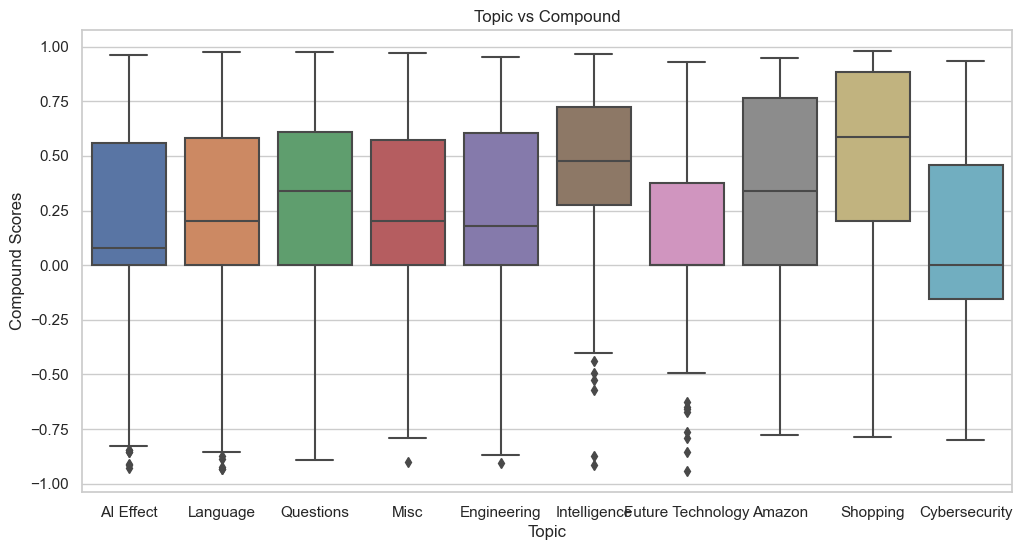

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Topic'], y=df['compound'], data=df)
plt.title('Topic vs Compound')
plt.xlabel('Topic')
plt.ylabel('Compound Scores')
plt.show()